Höfundur: Bjarni Þór Guðmundsson(btg7@hi.is) - Reiknifræði Skilaverkefni 6

Hér er liður 1(Verkefni 25)

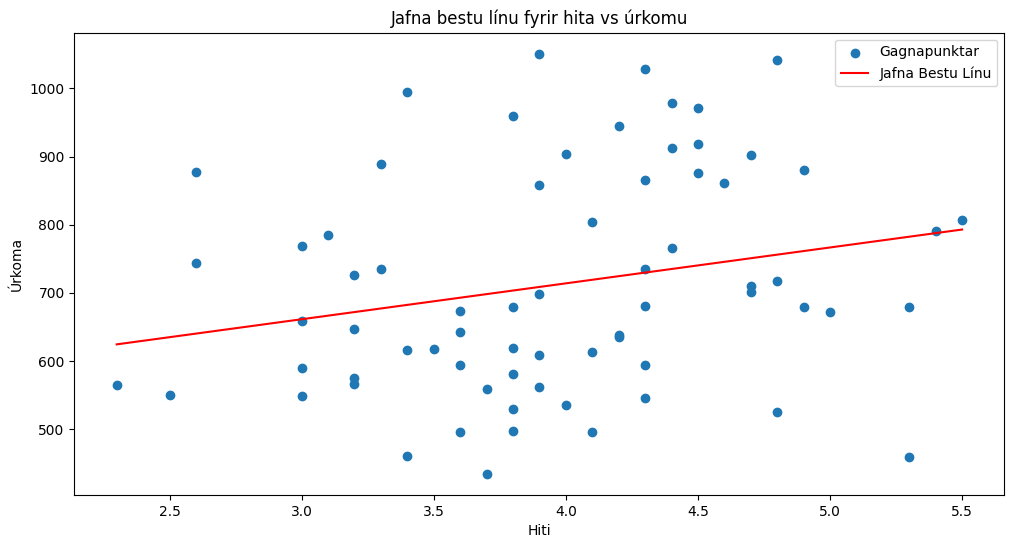

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

(ár, hiti, úrk) = np.loadtxt("https://cs.hi.is/python/hiti-urkoma.txt").T
(a, b) = np.polyfit(hiti, úrk, deg=1)
plt.figure(figsize=(12, 6))
plt.scatter(hiti, úrk, label='Gagnapunktar')
xp = np.linspace(hiti.min(), hiti.max())
yp = a*xp + b
plt.plot(xp, yp, 'r', label='Jafna Bestu Línu')
plt.xlabel('Hiti')
plt.ylabel('Úrkoma')
plt.title('Jafna bestu línu fyrir hita vs úrkomu')
plt.legend()
plt.show()

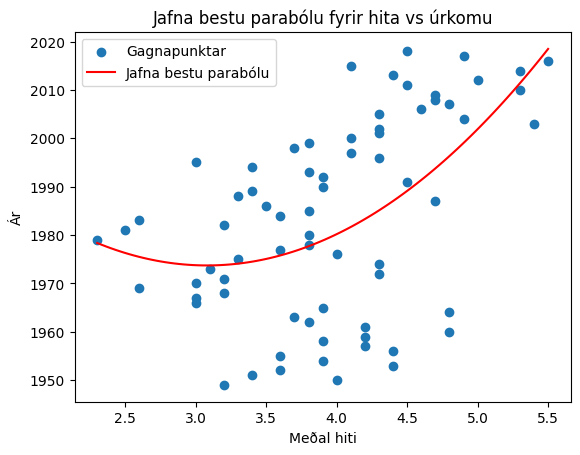

In [21]:
(c, d, e) = np.polyfit(hiti, ár, deg=2)
plt.scatter(hiti, ár, label='Gagnapunktar')
xp2 = np.linspace(hiti.min(), hiti.max(), 100)
yp2 = c*xp2**2 + d*xp2 + e
plt.plot(xp2, yp2, 'r', label='Jafna bestu parabólu')
plt.xlabel('Meðal hiti')
plt.ylabel('Ár')
plt.title('Jafna bestu parabólu fyrir hita vs úrkomu')
plt.legend()
plt.show()

Hér er liður 2(Verkefni 30)

In [22]:
## BYRJA
import matplotlib.pyplot as plt, numpy as np
from math import nan
plt.rc('axes', axisbelow=True)

def teikna_fylki(A):
  # Teiknar 2 x n flatarmyndarfylki
  plt.plot(A[0],A[1], lw=3, color='k')

def hliðra(A, h):
  # Leggur h við alla dálka A
  return A + np.reshape(h,(2,1))

1. Flatarmynd lýst með 2xn fylki

Búum til fylkið

$$ M = \begin{pmatrix}
0 & 3 & 3 & 0 & 0 & \text{nan} & 1 & 2 \\
0 & 0 & 2 & 2 & 0 & \text{nan} & 1 & 1
\end{pmatrix}$$

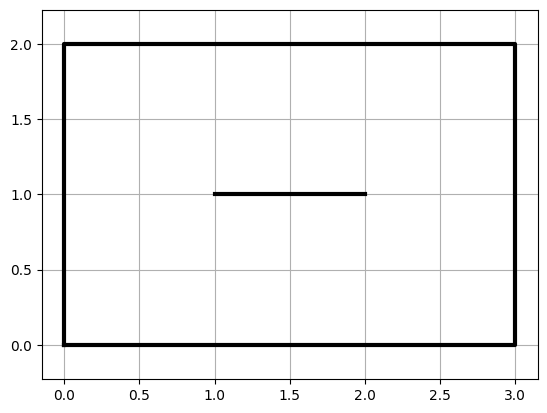

In [29]:
M = np.array([[0, 3, 3, 0, 0, np.nan, 1, 2],
              [0, 0, 2, 2, 0, np.nan, 1, 1]])

teikna_fylki(M)
theta = math.radians(30)

S = [[1, math.tan(theta)], [0, 1]]
M_skekkt = np.dot(S, M)

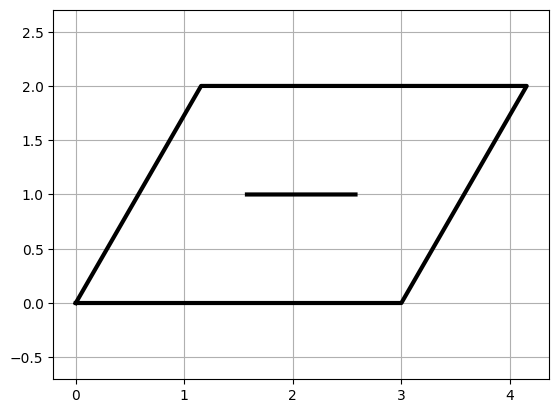

In [30]:
teikna_fylki(Skakkt)

2. Snúningsfylki

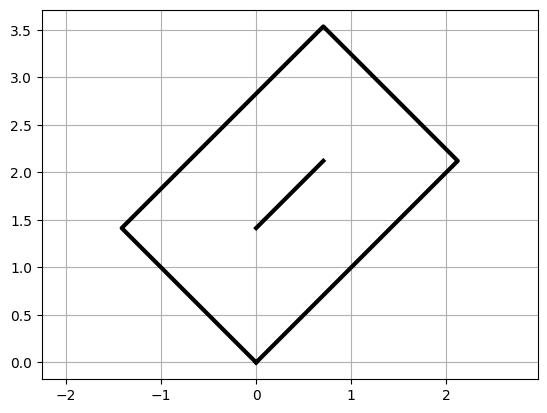

In [34]:
def Snuningur(angle):
  theta = np.radians(angle)
  R = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])
  return R

R = Snuningur(45)
Snuid = np.dot(R, M)
teikna_fylki(Snuid)

3. Sammiðja rétthyrningar

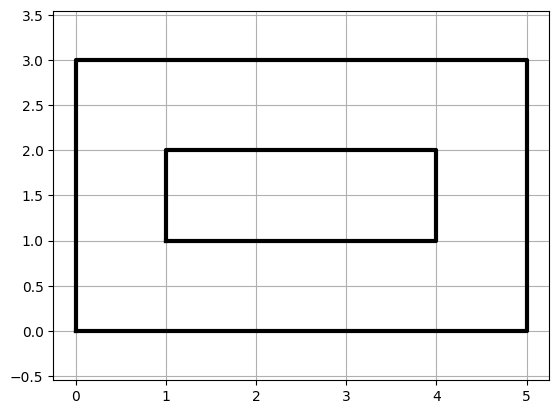

In [36]:
StoriKassi = np.array([[0, 5, 5, 0, 0],
              [0, 0, 3, 3, 0]])
LitliKassi = np.array([[1, 4, 4, 1, 1],
 [1, 1, 2, 2, 1]])

Stakkaðir = np.hstack((StoriKassi, np.array([[np.nan],[np.nan]]), LitliKassi))
teikna_fylki(Stakkaðir)

4. Þríhyrningur með hæð

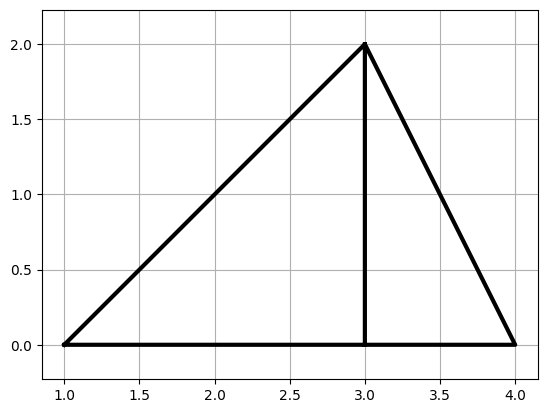

In [39]:
thrihyrningur = np.array([[1, 3, 4, 1],  #x-hnit í A, B, C og aftur í A
                         [0, 2, 0, 0]]) #y-hnit A, B, C og aftur í A

strik = np.array([[3, 3],  #x-hnit
                      [2, 0]]) #y-hnit

T = np.hstack((thrihyrningur, np.array([[np.nan], [np.nan]]), strik))

teikna_fylki(T)

5. Hliðra-snúa-hliðra

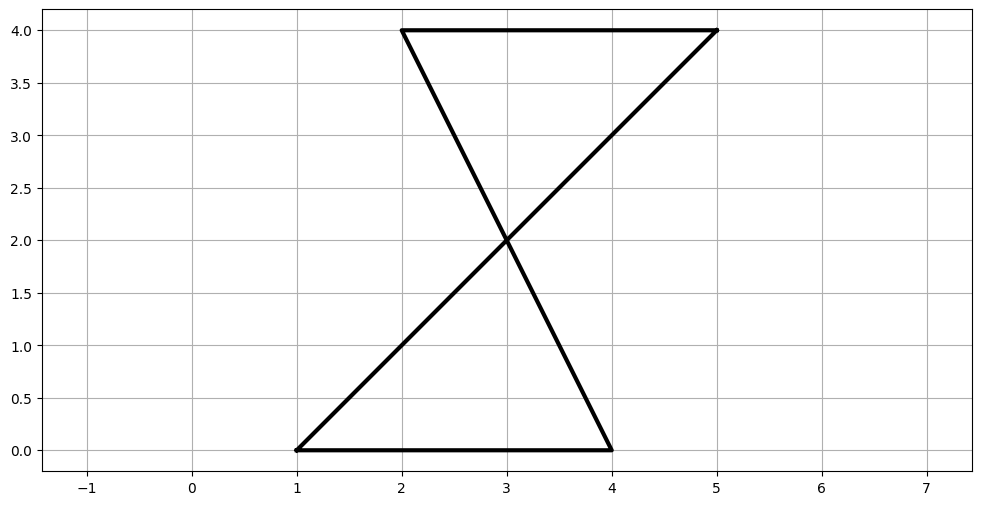

In [44]:
def snua_kringum_punkt(form, horn, punktur):
    faerdur = hliðra(form, -np.array(punktur))

    R = Snuningur(horn)
    umsnuningur = np.dot(R, faerdur)

    faerdur_aftur = hliðra(umsnuningur, np.array(punktur))
    return faerdur_aftur

T = np.array([[1, 3, 4, 1],
                        [0, 2, 0, 0]])

B_punktur = [3, 2]

T_snuinn = snua_kringum_punkt(T, 180, B_punktur)

plt.figure(figsize=(12, 6))
teikna_fylki(T)  # Upphaflegi þríhyrningurinn
teikna_fylki(T_snuinn)  #þríhyrningurinn eftir snúning


6. Snúa-spegla-snúa